# Pokemon 

### Libraries

In [159]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from PIL import Image
import requests
from io import BytesIO
import os
import random

### Preprocessing

In [160]:
#Load & preprocess dataset
df = pd.read_csv('pokemon.csv')


In [161]:
df.head(5)

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [162]:
#Check for null values
df.isnull().sum()

Unnamed: 0      0
image_url       0
Id              0
Names           0
Type1           0
Type2         542
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
dtype: int64

c:\Users\Diana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


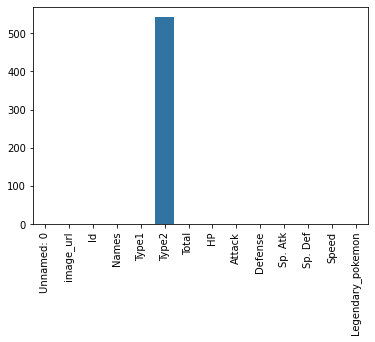

In [175]:
#Visualize null values
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);

In [21]:
#fill null values
df['Type2'].fillna('None', inplace=True)
df.isnull().sum()

Unnamed: 0    0
image_url     0
Id            0
Names         0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
dtype: int64

### Legendary Pokemon Visualizations

In [164]:
#Filter out pokemon with high base stats and create a column for legendary
#Assume legendary threshold is 600
threshold = 600
Legendary_pokemon = df['Total'] > threshold
df['Legendary_pokemon'] = Legendary_pokemon
df.head(5)

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary_pokemon
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,True
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False


In [26]:
df['legendary'] = df['Legendary_pokemon'].map({True: 'Legendary', False: 'Not Legendary'})
df.head(5)

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary_pokemon,legendary,non_legendary
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,Not Legendary,0
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,Not Legendary,0
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,Not Legendary,0
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,True,Legendary,1
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,None,309,39,52,43,60,50,65,False,Not Legendary,0


In [252]:
df['legendary'] = df['Legendary_pokemon']
df['non_legendary'] = -df['Legendary_pokemon']
df['legendary'] = df['legendary'].astype(int)
df['non_legendary'] = df['non_legendary'].astype(int)
df.head(5)

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary_pokemon,legendary,non_legendary
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False,0,1
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False,0,1
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False,0,1
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,True,1,0
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False,0,1


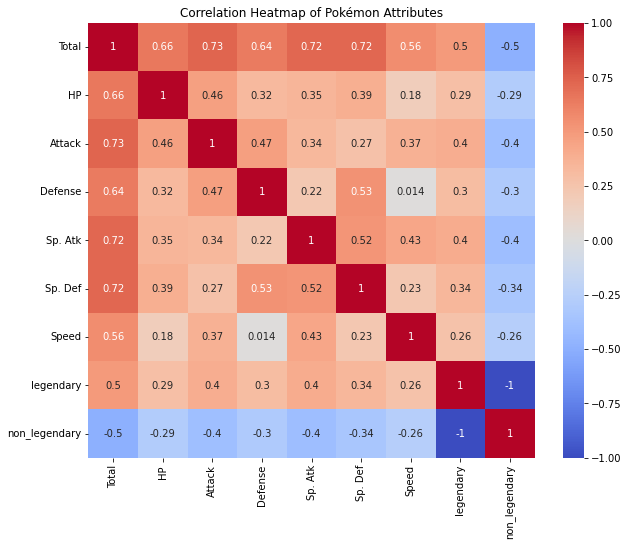

In [270]:
# Select the columns for the heatmap
columns = ['Type1','Type2','Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','legendary','non_legendary']

# Create a correlation matrix
corr_matrix = df[columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap of Pokémon Attributes')

# Show the plot
plt.show()


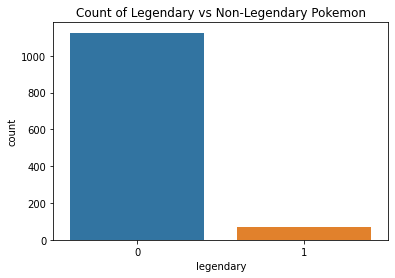

In [38]:
#count of leg vs non leg
sb.countplot(x='legendary', data=df)
plt.title('Count of Legendary vs Non-Legendary Pokemon')
plt.show()

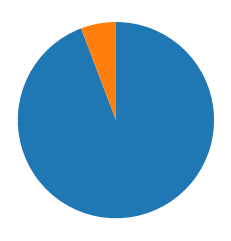

In [225]:
sorted_counts = df['Legendary_pokemon'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, textprops={'fontsize': 15, 'color': 'white'});
plt.axis('square');

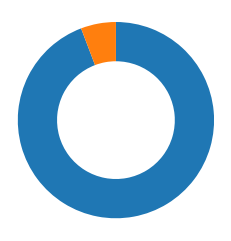

In [226]:
sorted_counts = df['Legendary_pokemon'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4}, textprops={'fontsize': 15, 'color': 'white'});
plt.axis('square');

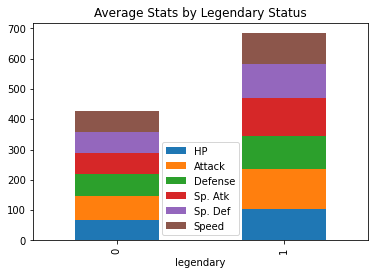

In [50]:
#Average stats by leg status
df.groupby('legendary').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].plot(kind='bar', stacked=True)
plt.title('Average Stats by Legendary Status')
plt.show()

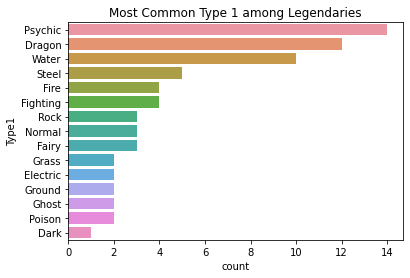

In [47]:
#commonest Type 1 among legendaries
sb.countplot(y='Type1', data=df[df['legendary']==True], order=df[df['legendary']==True]['Type1'].value_counts().index)
plt.title('Most Common Type 1 among Legendaries')
plt.show()


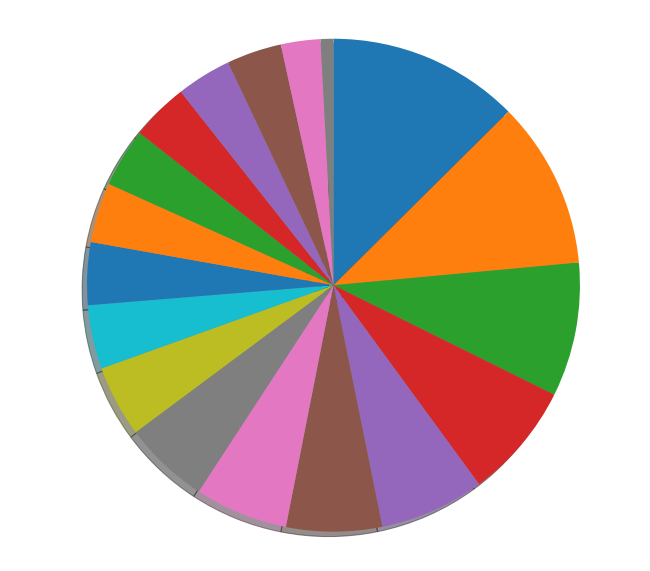

In [227]:
sorted_counts = df['Type1'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, shadow=True, textprops={'fontsize': 15, 'color': 'white'});
plt.axis('square');

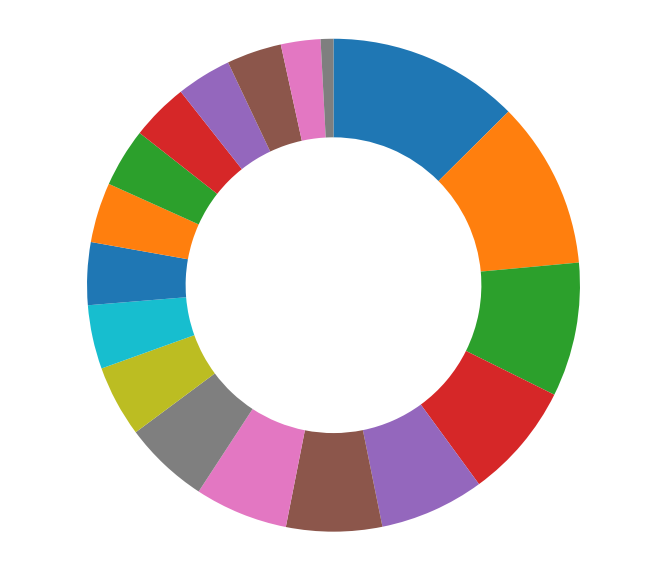

In [228]:
sorted_counts = df['Type1'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4}, textprops={'fontsize': 15, 'color': 'white'});
plt.axis('square');

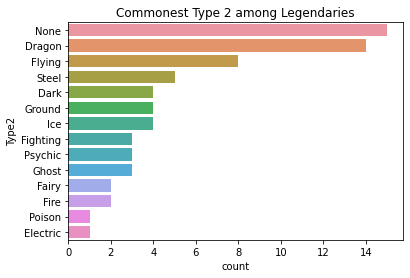

In [48]:
#commonest Type 2 among legendaries
sb.countplot(y='Type2', data=df[df['legendary']==True], order=df[df['legendary']==True]['Type2'].value_counts().index)
plt.title('Commonest Type 2 among Legendaries')
plt.show()

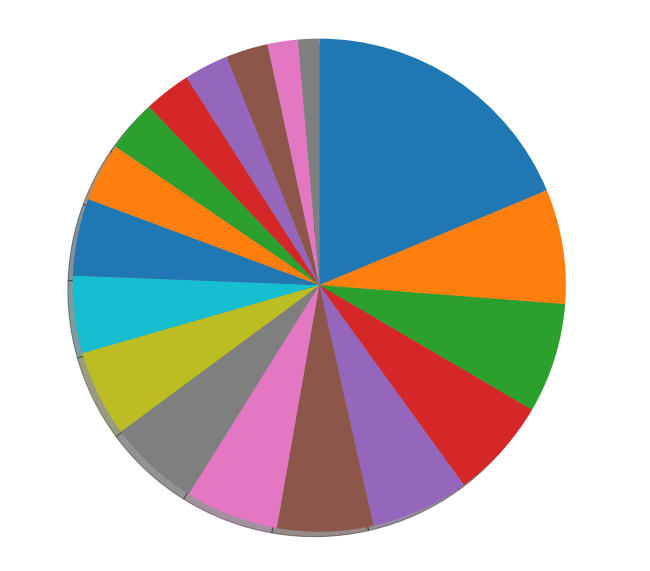

In [229]:
sorted_counts = df['Type2'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, shadow=True, textprops={'fontsize': 15, 'color': 'white'});
plt.axis('square');

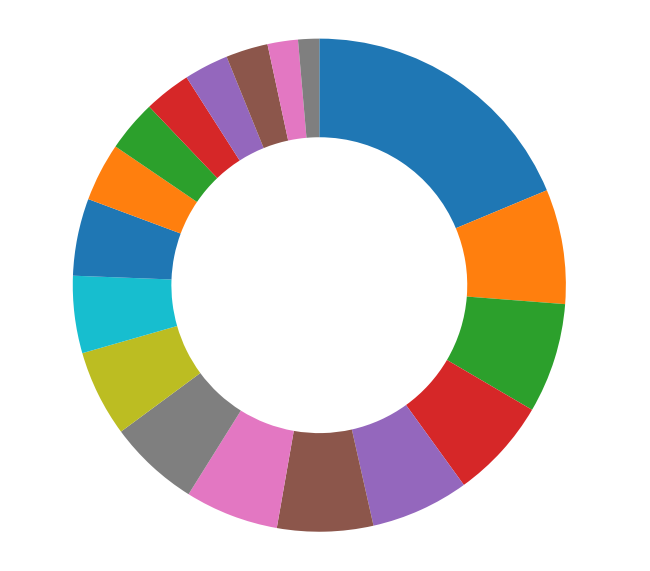

In [230]:
sorted_counts = df['Type2'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4}, textprops={'fontsize': 15, 'color': 'white'});
plt.axis('square');

In [79]:
# Filter the 'Names' column based on the 'Legendary' column
filtered_df = df.loc[df['Legendary_pokemon'] == True, 'Names']

# Create a new dataframe with the filtered column
new_df = pd.DataFrame({'Legendary Names': filtered_df})

# Filter out similar names
final_df = new_df.drop_duplicates(subset='Legendary Names')
# Print the new dataframe
final_df.head(10)

,Legendary Names
3,Venusaur Mega Venusaur
7,Charizard Mega Charizard X
8,Charizard Mega Charizard Y
12,Blastoise Mega Blastoise
175,Gyarados Mega Gyarados
189,Aerodactyl Mega Aerodactyl
200,Mewtwo
201,Mewtwo Mega Mewtwo X
202,Mewtwo Mega Mewtwo Y
235,Ampharos Mega Ampharos


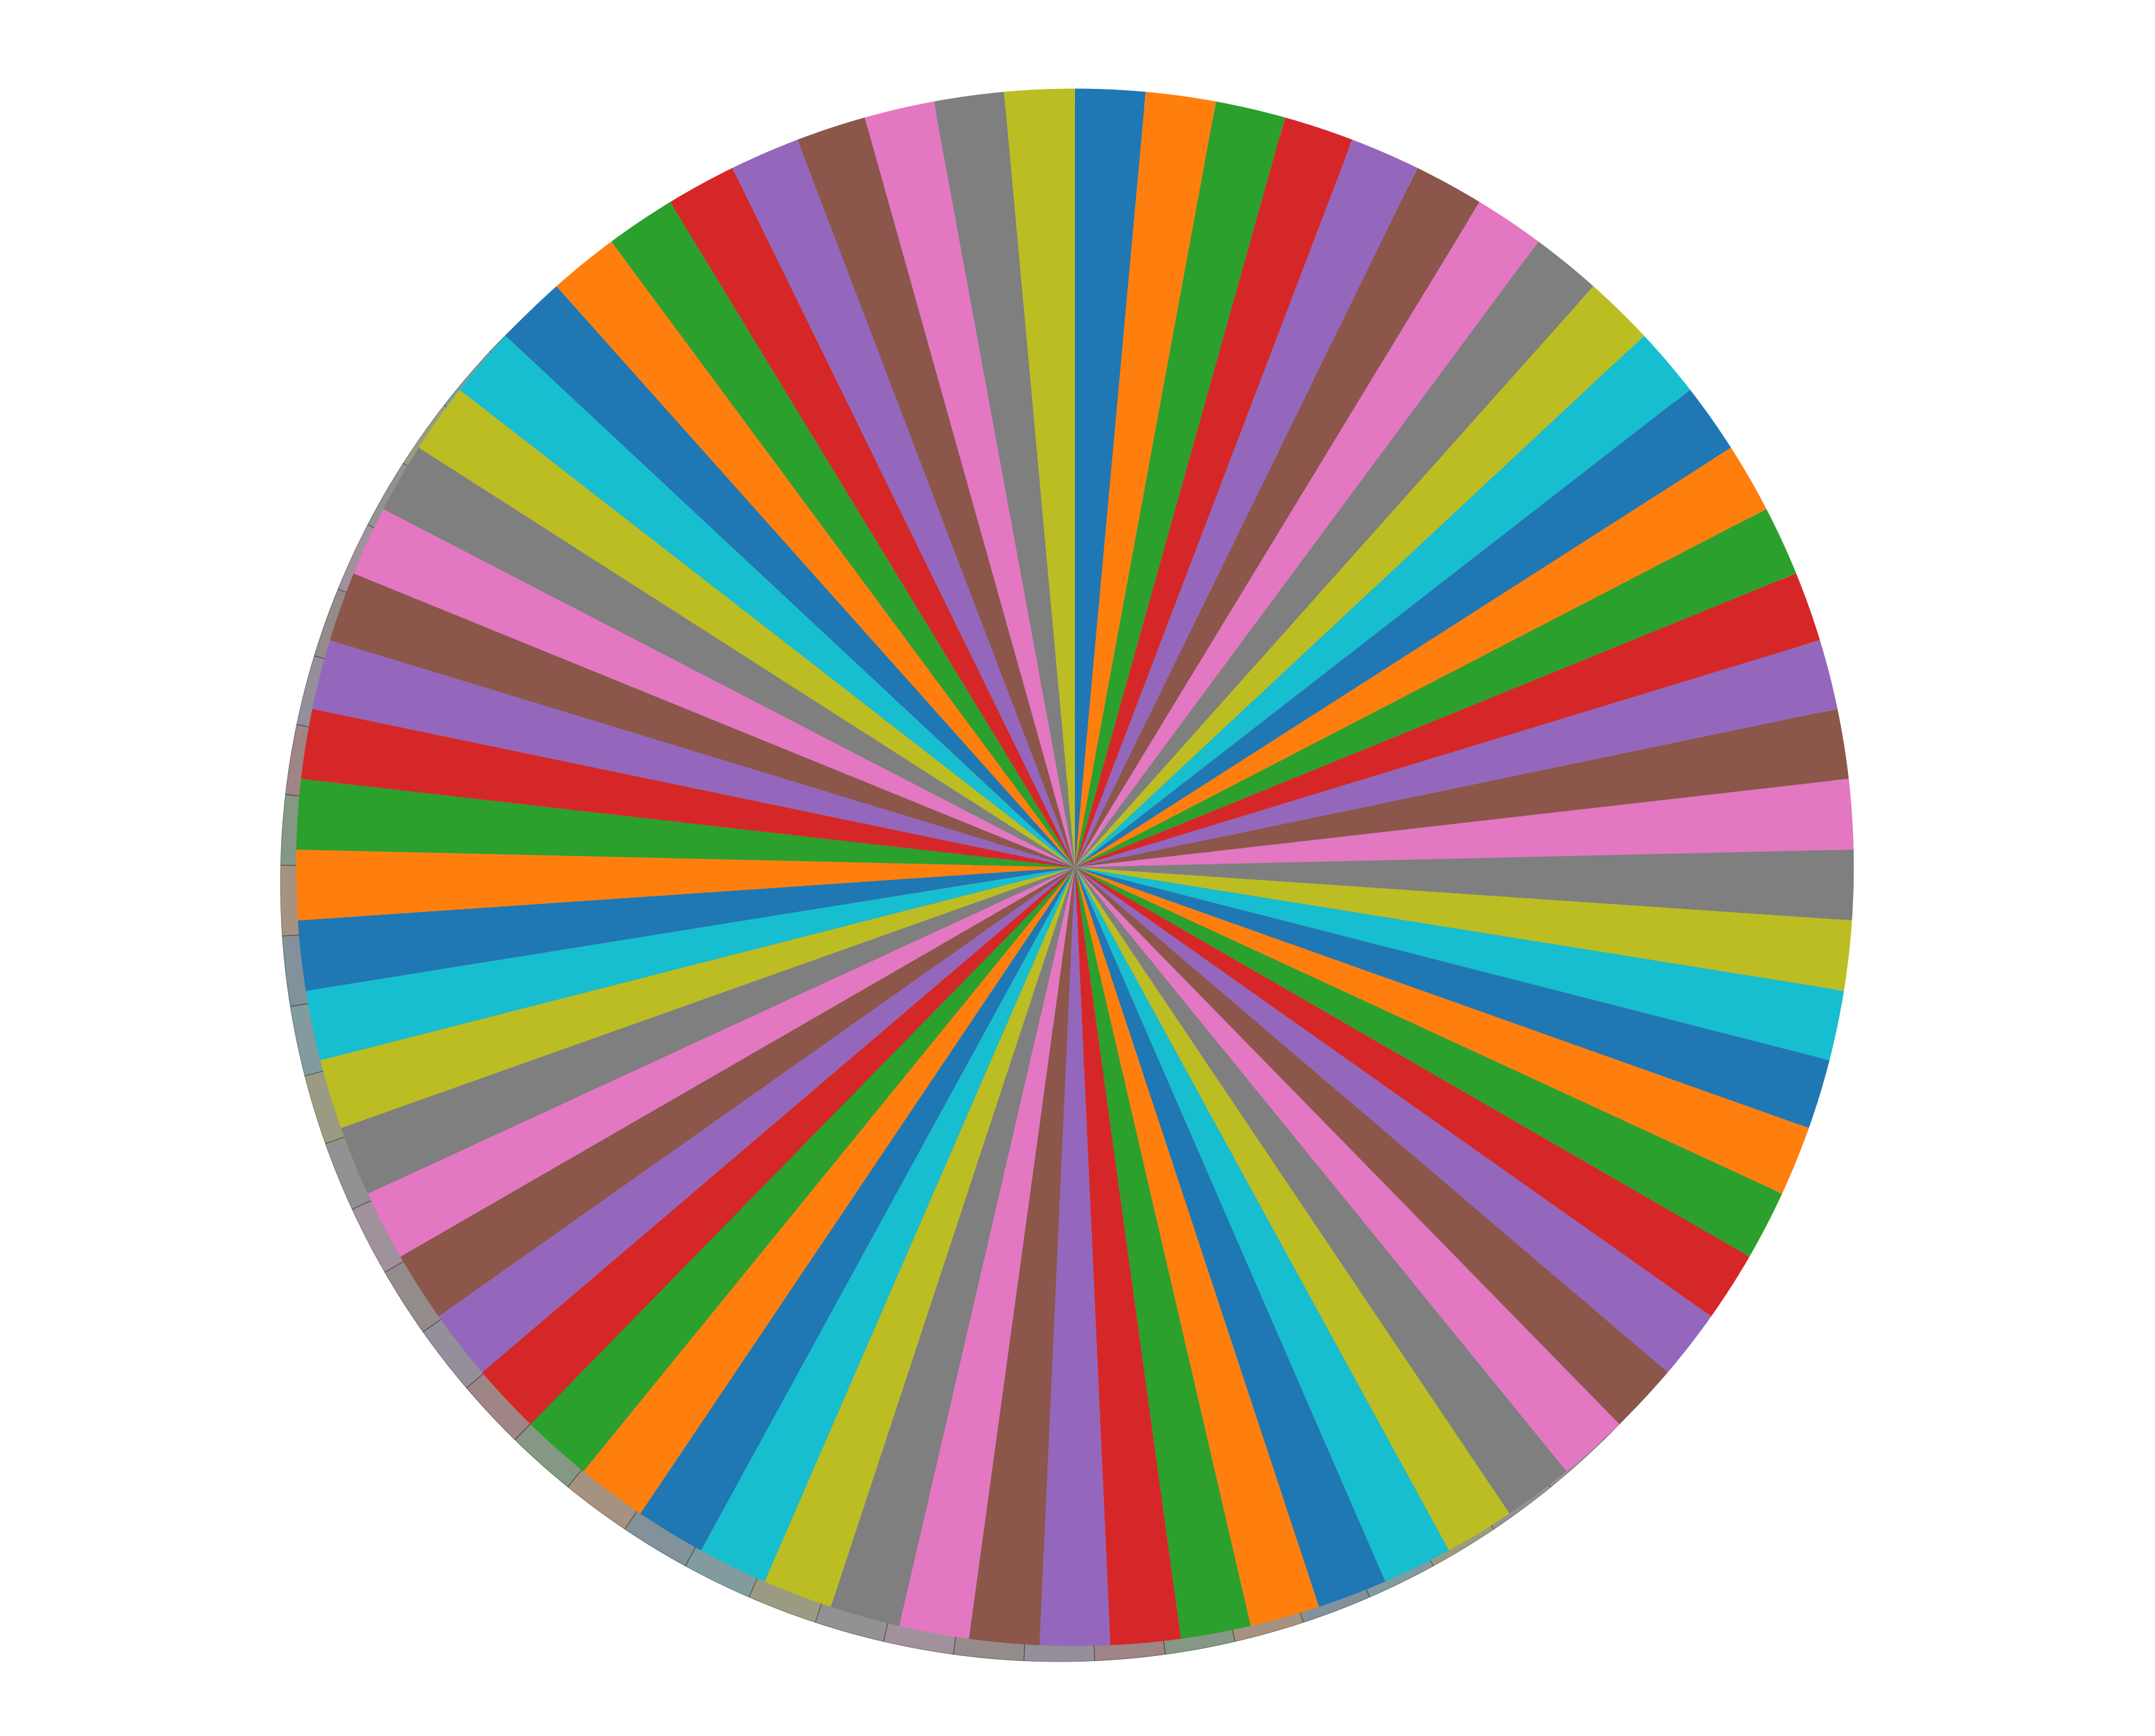

In [231]:
sorted_counts = final_df['Legendary Names'].value_counts()
fig, ax = plt.subplots(figsize=(50, 50))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, shadow=True, textprops={'fontsize': 25, 'color': 'white'});
plt.axis('square');

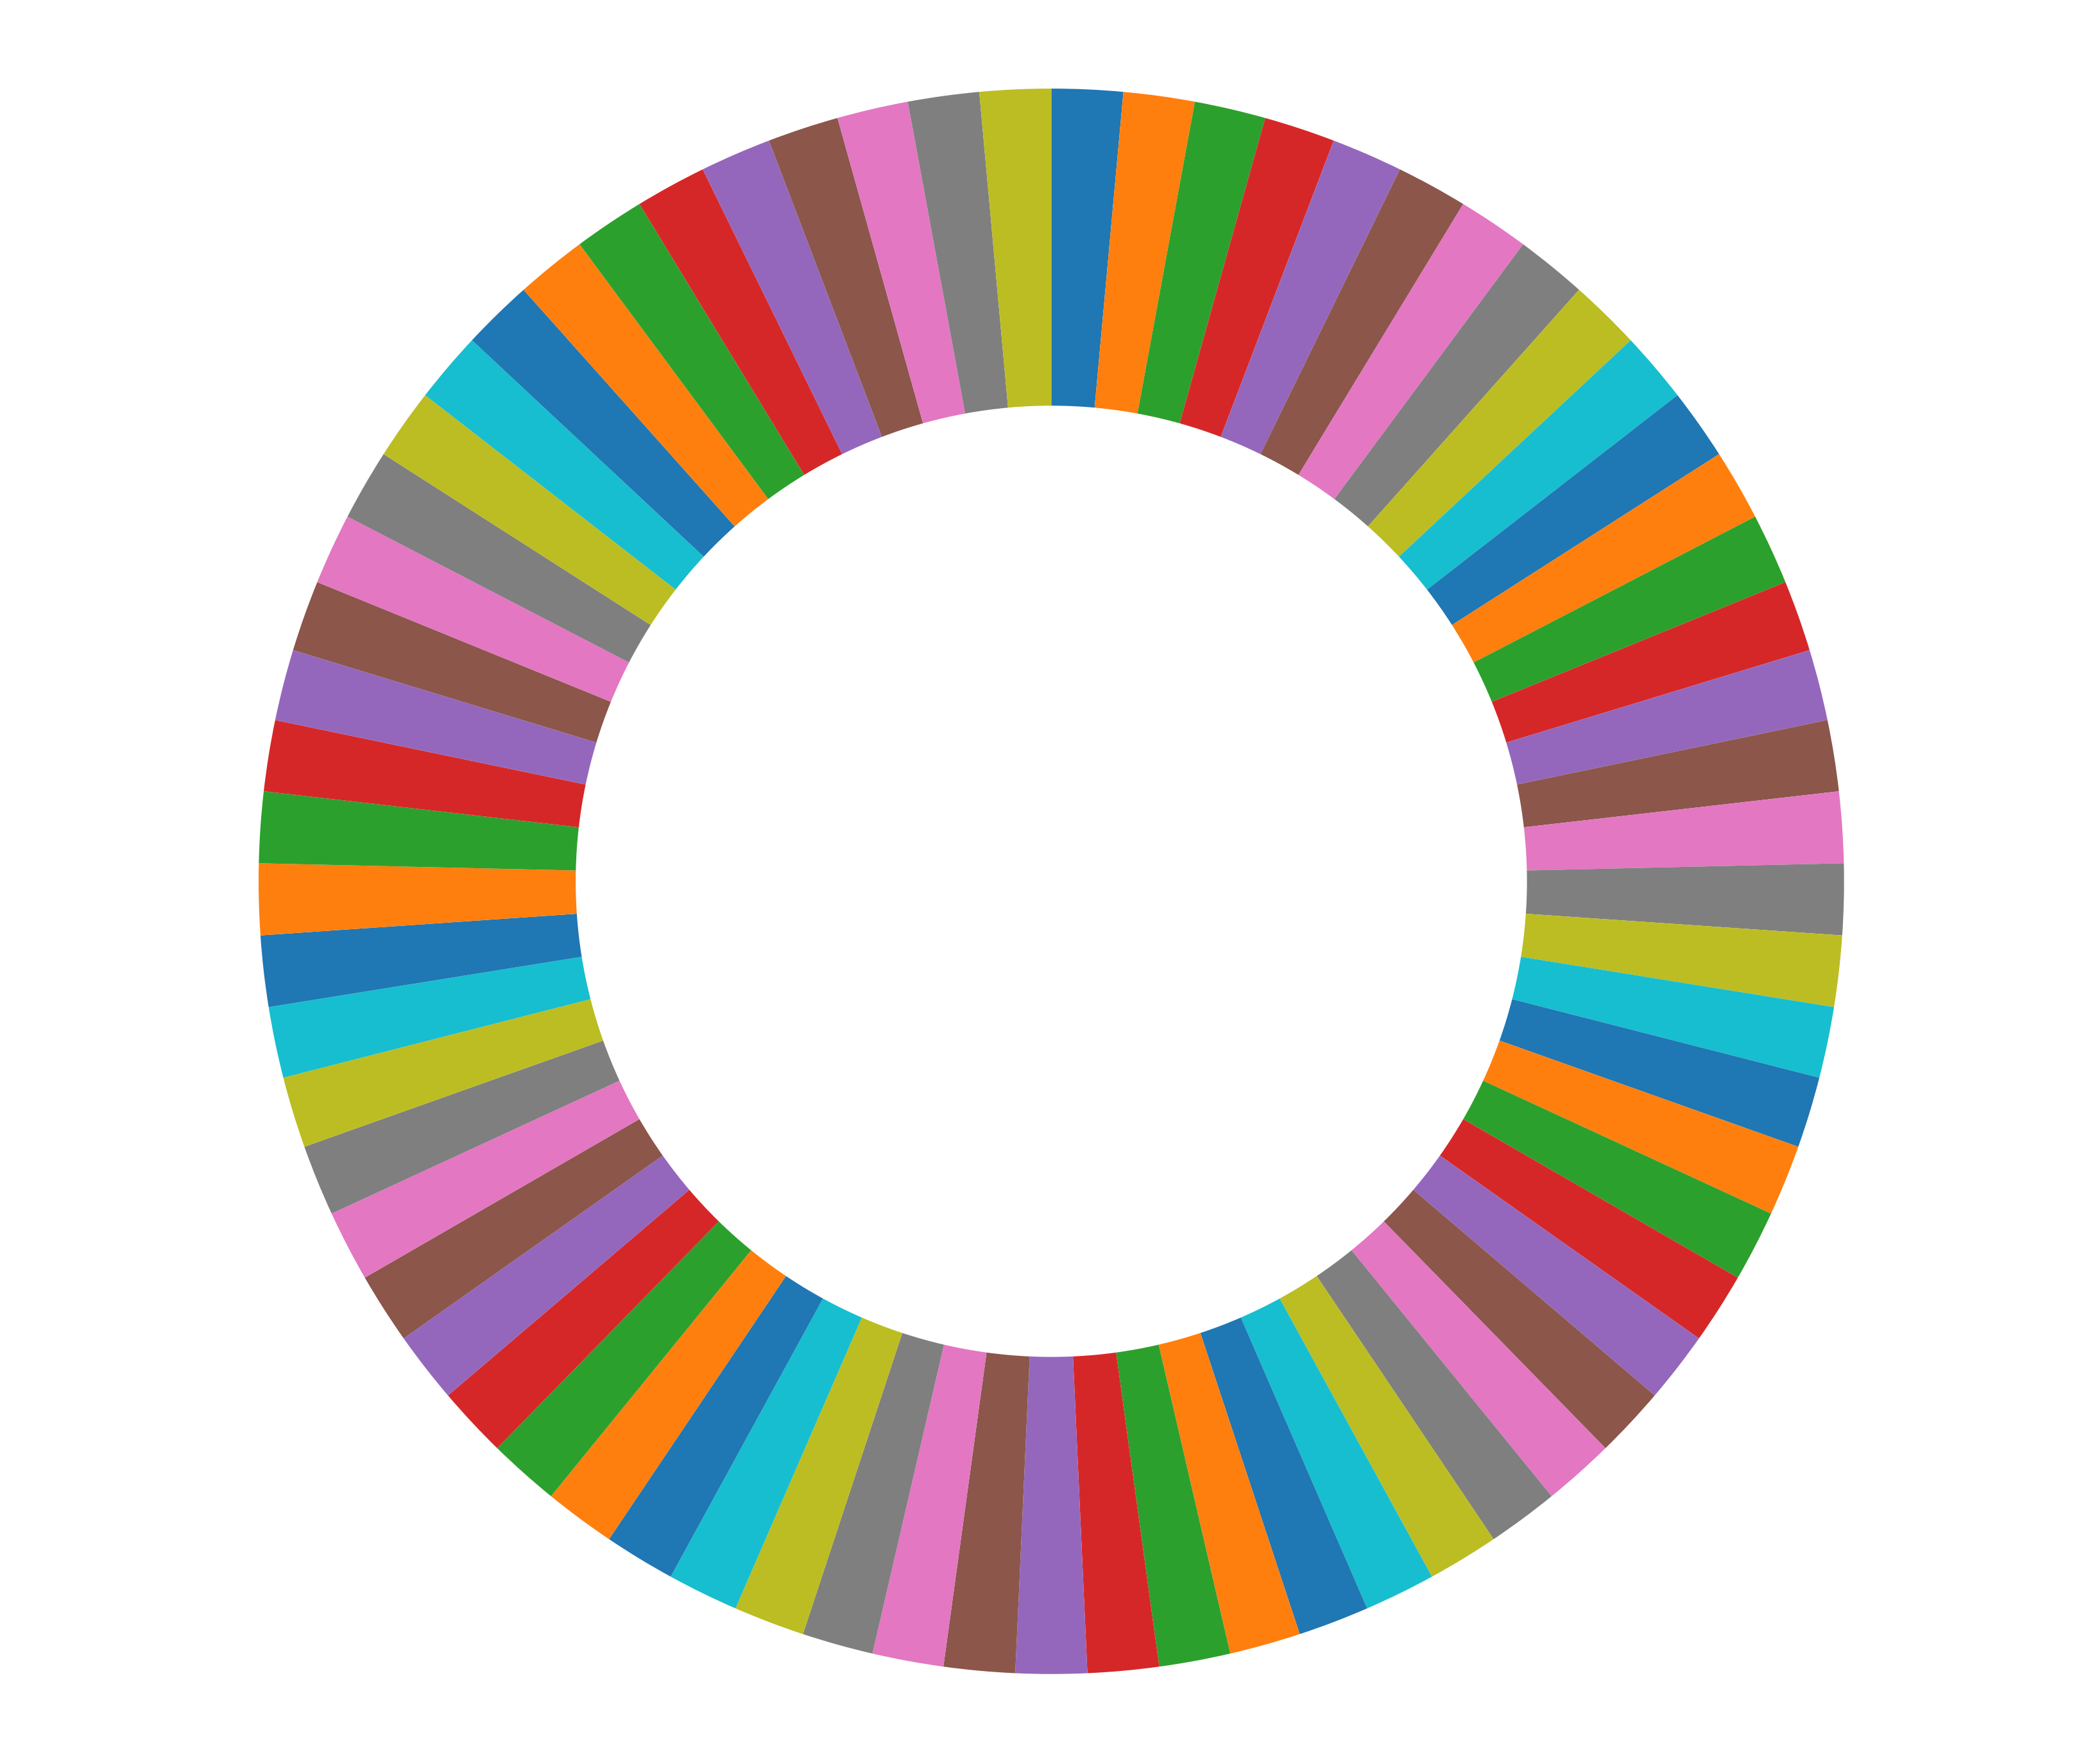

In [234]:
sorted_counts = final_df['Legendary Names'].value_counts()
fig, ax = plt.subplots(figsize=(50, 50))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4}, textprops={'fontsize': 20, 'color': 'white'});
plt.axis('square');

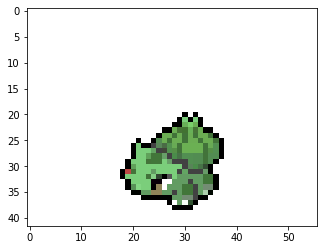

Legend Name: Venusaur Mega Venusaur


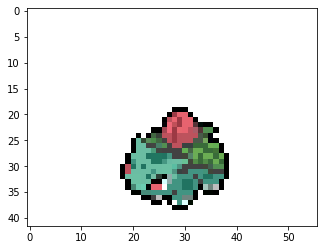

Legend Name: Venusaur Mega Venusaur


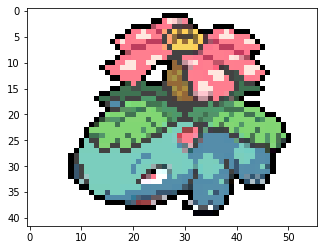

Legend Name: Venusaur Mega Venusaur


In [272]:
# Function to display image
def display_image_with_name(url, name):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.show()
    plt.imshow(img)
    plt.show()
    print("Legend Name:", name)
for url in df['image_url'][:3]:
    display_image_with_name(url, name)

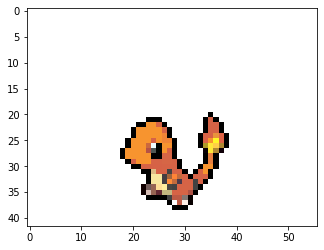

Legend Name: Charmander


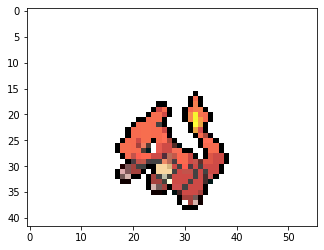

Legend Name: Charmeleon


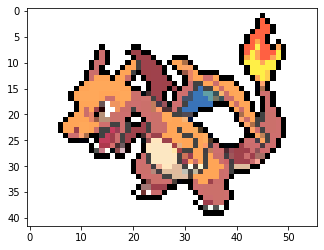

Legend Name: Charizard


In [113]:
#evolution chain with images    
evolution_chain = ['Charmander', 'Charmeleon', 'Charizard']

for name in evolution_chain:
    url = df[df['Names'] == name]['image_url'].values[0]
    display_image_with_name(url, name)

### pokemon images

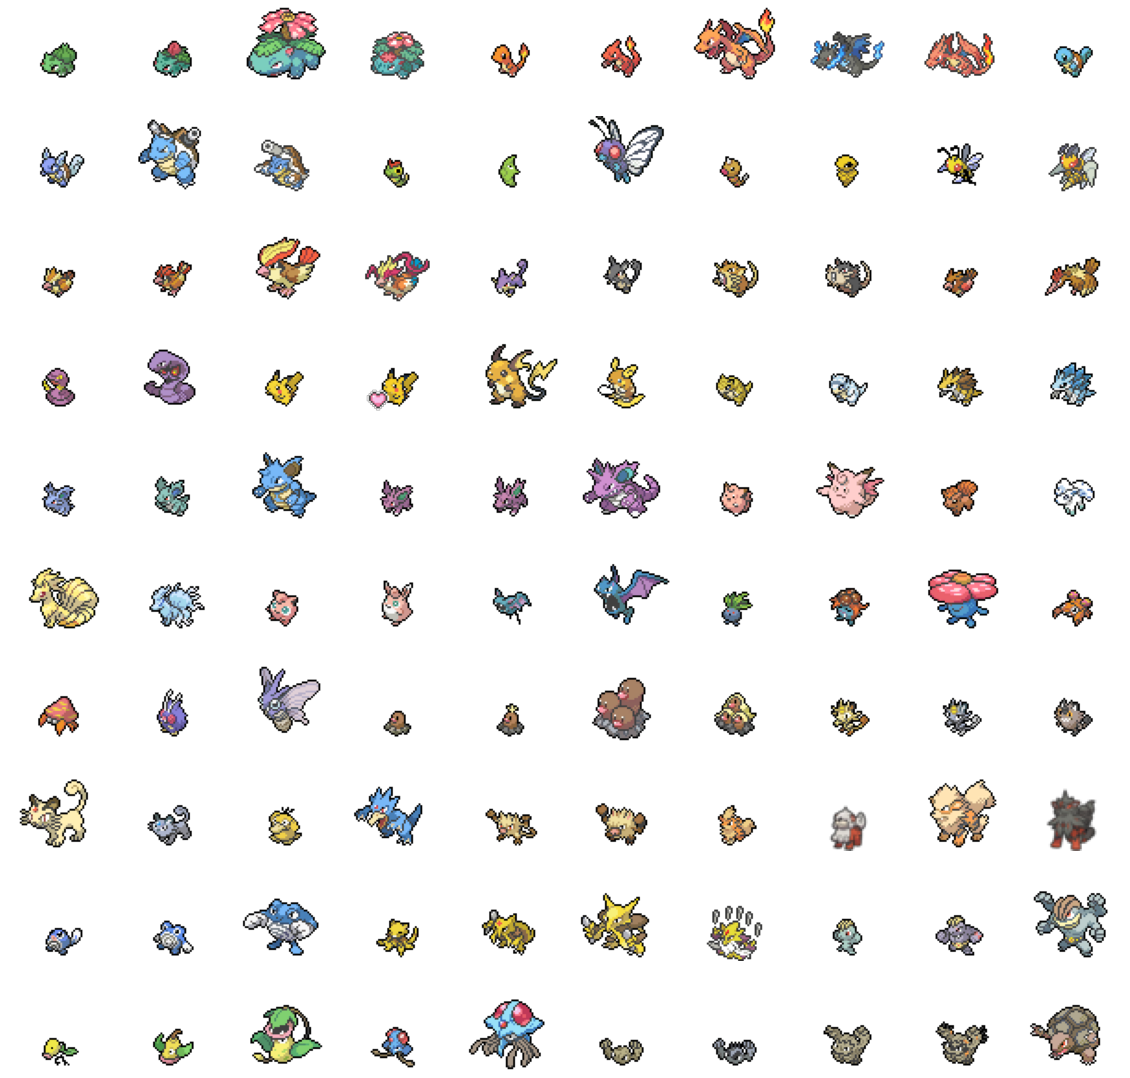

In [261]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Limit the number of images to display to a maximum of 100
num_images = min(len(df), 100)

# Iterate over the dataset and display the images
for i in range(num_images):
    image_path = df.loc[i, 'image_url']
    response = requests.get(image_path)
    img = Image.open(BytesIO(response.content))
    plt.subplot(10, 10, i+1)
    plt.imshow(img, cmap='viridis')
    plt.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()

In [115]:
#Read the image folder
image_folder = 'Pokemon_images'
image_files = os.listdir(image_folder)

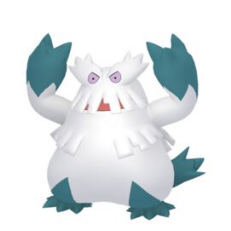

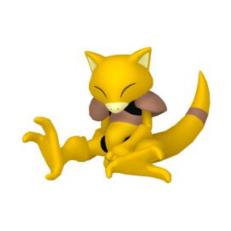

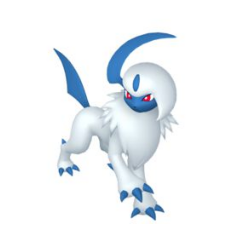

In [274]:
#display images
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
for image in image_files[:3]:
    display_image(os.path.join(image_folder, image))    

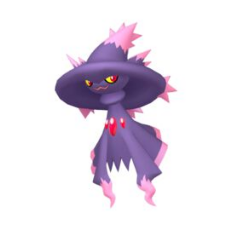

In [137]:
#display images randmoly
random_image = os.path.join(image_folder, random.choice(image_files))
display_image(random_image)

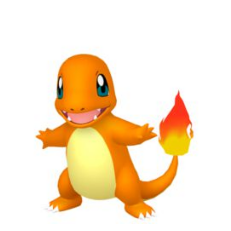

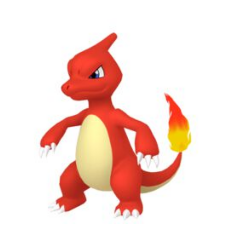

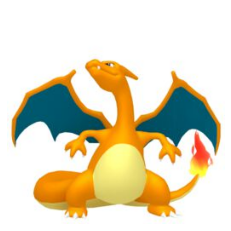

In [158]:
fire_type_pokemon = df[df['Type1'] == 'Fire']
for _, row in fire_type_pokemon.head(3).iterrows():
    pokemon_name = row['Names']
    image_name = pokemon_name.lower() + '.jpg'
    image_path = os.path.join(image_folder, image_name)
    
    if os.path.exists(image_path):
        display_image(image_path)
    else:
        print(f"Image not found for {pokemon_name}")